<a href="https://colab.research.google.com/github/manishramamoorthy/Machine-Learning/blob/main/Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection**

In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/diabetes.csv")

**Data Preprocessing**

In [ ]:
# Top 5 Rows Of DataSet
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Last 5 Rows Of DataSet
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# Number of Rows and Columns
data.shape
print("Number of Rows: ",data.shape[0])
print("Number of Columns: ",data.shape[1])

Number of Rows:  768
Number of Columns:  9


In [ ]:
# Data Types
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# Getting Information of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Statistical Measure

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Value Counts
# It Is Not Imbalanced Learning
data["Outcome"].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

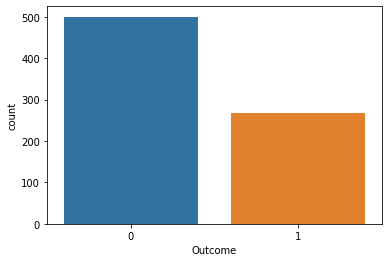

In [ ]:
sns.countplot(x="Outcome",data=data)

0 -> Non-Diabetics      
1 -> Diabetics

In [ ]:
data.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**Missing Values**

In [ ]:
print("Any Missing Values: ",data.isnull().values.any())

Any Missing Values:  False


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Drop Duuplicates Values**

In [ ]:
dup_data = data.duplicated().any()

In [ ]:
print("Any Duplicates Values: ",dup_data)

Any Duplicates Values:  False


In [ ]:
data = data.drop_duplicates()

**Seaparating a Dataset**

In [ ]:
X = data.drop(columns="Outcome",axis=1)
y = data["Outcome"]

**Train And Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=7)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (576, 8) (192, 8)


**Data Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Modelling**

1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Prediction

In [ ]:
y_pred = logistic.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
logistic.coef_

array([[ 1.51392813e-01,  2.68376716e-02, -2.17817701e-02,
        -2.19789393e-03, -6.58864428e-06,  6.06376737e-02,
         1.65571317e+00,  9.59065010e-03]])

In [ ]:
logistic.intercept_

array([-6.16992536])

In [ ]:
data = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
data

,Actual,Predicted
408,1,1
61,1,0
531,0,0
515,1,0
595,1,1
...,...,...
284,1,0
475,0,0
89,0,0
115,1,0


2) SVC (Support Vector Classifier)

In [ ]:
from sklearn import svm
svm = svm.SVC(kernel="linear")
svm.fit(X_train,y_train)

SVC(kernel='linear')

Prediction

In [ ]:
y_pred = svm.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
svm.coef_

array([[ 1.23373871e-01,  2.67878634e-02, -1.15378211e-02,
        -2.29179380e-03,  4.98043868e-04,  5.32194358e-02,
         7.93683802e-01, -2.89038082e-03]])

In [ ]:
svm.intercept_

array([-5.6051925])

In [ ]:
data2 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
data2

,Actual,Predicted
408,1,1
61,1,0
531,0,0
515,1,1
595,1,1
...,...,...
284,1,0
475,0,0
89,0,0
115,1,0


3) KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

Prediction

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
data3 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
data3

,Actual,Predicted
408,1,1
61,1,0
531,0,0
515,1,0
595,1,1
...,...,...
284,1,0
475,0,0
89,0,0
115,1,0


**Evaluation Metrics**           

1) Accuracy Score       
2) F1 Score             
3) AUROC Score

Evaluation of Logistic Regression

Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score


In [ ]:
# Accuracy Score
Accuracy_Score = logistic.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.75


In [ ]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[111,  14],
       [ 34,  33]])

In [ ]:
# f1 score
F1_Score = f1_score(y_test,y_pred)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.6031746031746031


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


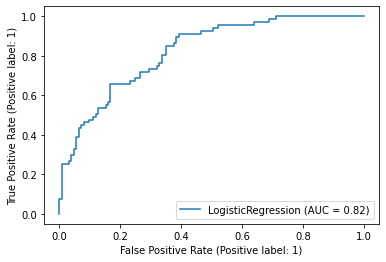

In [ ]:
# AUROC Score
plot_roc_curve(logistic,X_test,y_test)

SVC (Support Vector Classifier)

In [ ]:
# Accuracy Score
Accuracy_Score = svm.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.7864583333333334


In [ ]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[112,  13],
       [ 28,  39]])

In [ ]:
# f1 score
F1_Score = f1_score(y_test,y_pred)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.6031746031746031


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


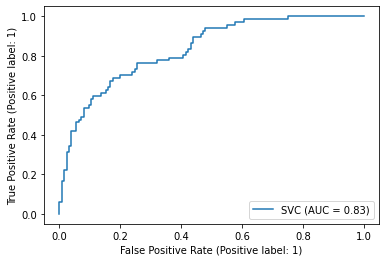

In [ ]:
# AUROC Score
plot_roc_curve(svm,X_test,y_test)

KNN Classification

In [ ]:
# Accuracy Score
Accuracy_Score = knn.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.7395833333333334


In [ ]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[104,  21],
       [ 29,  38]])

In [ ]:
# f1 score
F1_Score = f1_score(y_test,y_pred)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.6031746031746031


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


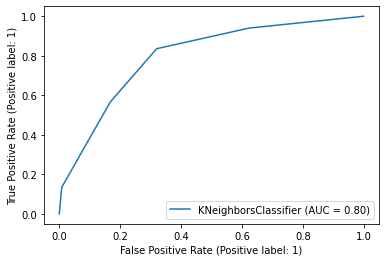

In [ ]:
# AUROC Score
plot_roc_curve(knn,X_test,y_test)

The Three Model Best Model is SVC        
AUROC Score = 0.83         
SVC is Better model compare to Logistic Regression and KNN Classifier


**Making a Prediction**

In [ ]:
prediction  = svm.predict([[0,137,40,35,168,43.1,2.288,33]])
print(prediction)
if prediction[0] == 0:
  print("The Person is Not Diabetes")
else:
  print("The Person is Diabetes")  

[1]
The Person is Diabetes


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


**Saving the Trained Model**

In [ ]:
import pickle

In [ ]:
filename = "svc_model.sav"
pickle.dump(svm,open(filename,"wb"))

In [ ]:
# Loading the Saved Model
loaded_model = pickle.load(open("/content/svc_model.sav","rb"))

In [ ]:
prediction  = loaded_model.predict([[0,137,40,35,168,43.1,2.288,33]])
print(prediction)
if prediction[0] == 0:
  print("The Person is Not Diabetes")
else:
  print("The Person is Diabetes")  

[1]
The Person is Diabetes


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
